# Notebook 9: Nyquist, Frequency Specifications and Time Delays

© 2024 ETH Zurich, Mark Benazet Castells, Jonas Holinger, Felix Muller, Matteo Penlington; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli

This interactive notebook is designed to introduce fundamental concepts in control systems engineering. It introduces the Nyquist plot, Nyquist criterion and robustness (gain/phase) margins.

Authors:
- Jonas Holinger; jholinger@ethz.ch
- Shubham Gupta; shugupta@ethz.ch

# Learning Objectives

After completing this material, you should be able to:
- Understand the origin of the Nyquist plot, and provided with a transfer function, plot the Nyquist. 
- Understand and apply the Nyquist criterion to stabilize a system.
- Identify the gain and phase margins from a Bode/Nyquist plot, and their implications.

In [1]:
# import libraries

%pip install numpy matplotlib scipy ipywidgets control IPython sympy

import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Solution PS11_notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
import control

def parse_coefficients(coeff_str):
    """
    Parse a string of coefficients separated by commas into a list of floats.
    """
    try:
        coeffs = [float(c.strip()) for c in coeff_str.split(',') if c.strip()]
        if not coeffs:
            raise ValueError("Coefficient list cannot be empty.")
        return coeffs
    except ValueError as e:
        raise ValueError(f"Invalid input: {e}")

def generate_nyquist_and_poles(b, c, k):
    """
    Generate Nyquist plot for L(s) and display poles of closed-loop transfer function T(s).
    """
    with output:
        clear_output(wait=True)
        try:
            # Parse numerator and denominator coefficients
            num = parse_coefficients(b)
            den = parse_coefficients(c)
            
            # Create open-loop transfer function L(s)
            L = control.TransferFunction(num, den)
            
            # Generate Nyquist plot
            plt.figure()
            control.nyquist_plot(L)
            plt.show()
            
        except ValueError as ve:
            display(Markdown(f"**Error:** {ve}"))
        except Exception as e:
            display(Markdown(f"**An unexpected error occurred:** {e}"))

# Input widgets for numerator and denominator coefficients
numerator_input = widgets.Text(
    value='',
    placeholder='Enter a list of coefficients separated by commas, highest order first',
    description='Numerator:',
    disabled=False
)

denominator_input = widgets.Text(
    value='',
    placeholder='Enter a list of coefficients separated by commas, highest order first',
    description='Denominator:',
    disabled=False
)

feedback_gain = widgets.FloatText(
    value=1.0,
    description='Feedback Gain:',
    disabled=False
)

# Button to generate Nyquist plot and poles
generate_button = widgets.Button(
    description='Generate Nyquist Plot',
    button_style='success',
    tooltip='Click to generate Nyquist plot and compute closed-loop poles',
    # icon='check'
)

# Output area
output = widgets.Output()

# Event handler for button click
def on_button_click(b):
    generate_nyquist_and_poles(numerator_input.value, denominator_input.value, feedback_gain.value)

generate_button.on_click(on_button_click)

# Display the widgets
display(numerator_input, denominator_input, generate_button,feedback_gain, output)



Text(value='', description='Numerator:', placeholder='Enter a list of coefficients separated by commas, highes…

Text(value='', description='Denominator:', placeholder='Enter a list of coefficients separated by commas, high…

Button(button_style='success', description='Generate Nyquist Plot', style=ButtonStyle(), tooltip='Click to gen…

FloatText(value=1.0, description='Feedback Gain:')

Output()

# Robustness Margins: Gain and Phase Margin



The distance from the Nyquist plot to the $\frac{-1}{k}$ point is a measure of system robustness or how far our system is from instability. We measure this robustness using the **gain margin** and **phase margin**.

> The **gain margin** is the distance from the current magnitude to 0 dB at the phase crossover frequency, $ \omega_{pc} $. 
> The **phase margin** is the distance between the current phase and -180° at the gain crossover frequency, $ \omega_c $.

**Note**:

For a system to be stable, the magnitude plot should be below 0 dB when the phase plot crosses -180°.

* The gain crossover frequency, $ \omega_c $, is the frequency where the Bode plot crosses 0 dB, that is, where $ \left| L(j\omega_c) \right| = 1 $.
* The phase crossover frequency, $ \omega_{pc} $, is the frequency where the Bode plot crosses -180°, that is, where $ \angle L(j\omega_{pc}) = -180° $.

**Remember:** Gain and phase margin can only be used if the system is open-loop stable and has minimum phase.


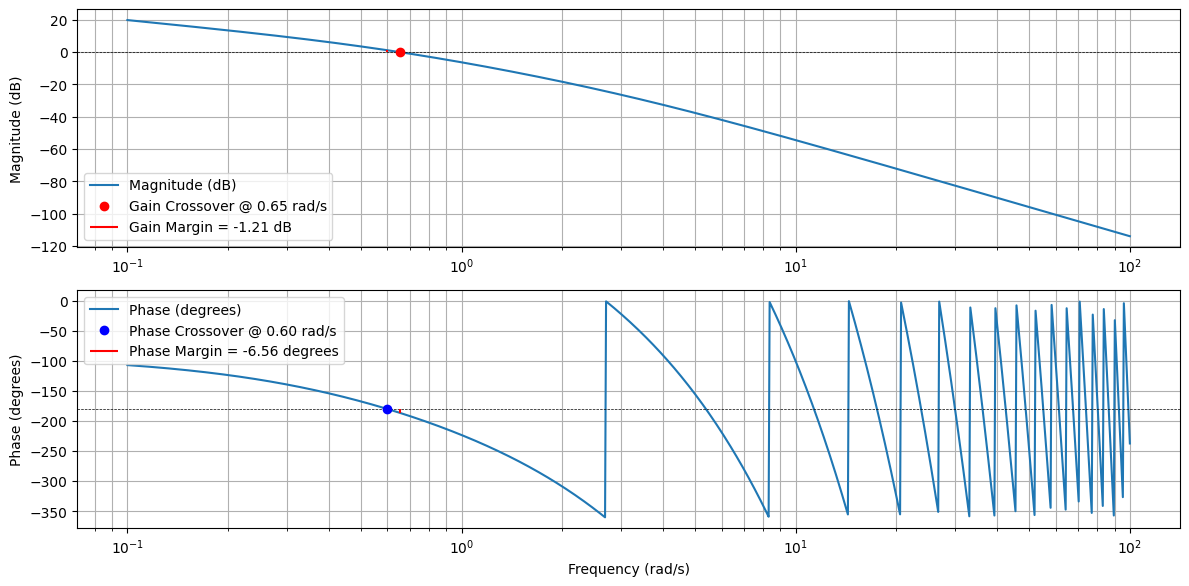

In [82]:
s = ct.TransferFunction.s

sys = ct.tf(2 / (s * (s**2 + 4*s + 2)))
gm, pm, wcg, wcp = ct.margin(sys)
pm = pm -np.degrees(wcp)
gm = 0.87
    

mag, phase, omega = ct.bode_plot(sys, dB=True, deg=True, plot=False)
mag = 20 * np.log10(mag)
phase = np.degrees(phase-omega)
phase = phase%(-360)
    

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.semilogx(omega, mag, label='Magnitude (dB)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

if not np.isnan(wcp):
    plt.plot(wcp, 0, 'ro', label=f'Gain Crossover @ {wcp:.2f} rad/s')
if gm != float('inf'):
    plt.vlines(0.6, 0, -20 * np.log10(gm), color='red', label=f'Gain Margin = {20 * np.log10(gm):.2f} dB')

plt.ylabel('Magnitude (dB)')
plt.legend(loc='best')
plt.grid(True, which="both")

plt.subplot(2, 1, 2)
plt.semilogx(omega, phase, label='Phase (degrees)')
plt.axhline(-180, color='black', linewidth=0.5, linestyle='--')

if not np.isnan(wcg):
    plt.plot(0.6, -180, 'bo', label=f'Phase Crossover @ {0.6:.2f} rad/s')
if pm != float('inf'):
    plt.vlines(wcp, -180, -180 + pm, color='red', label=f'Phase Margin = {pm:.2f} degrees')

plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (rad/s)')
plt.legend(loc='best')
plt.grid(True, which="both")

plt.tight_layout()
plt.savefig('bode_plot_sol.jpg', format='jpg', dpi=300)
plt.show()

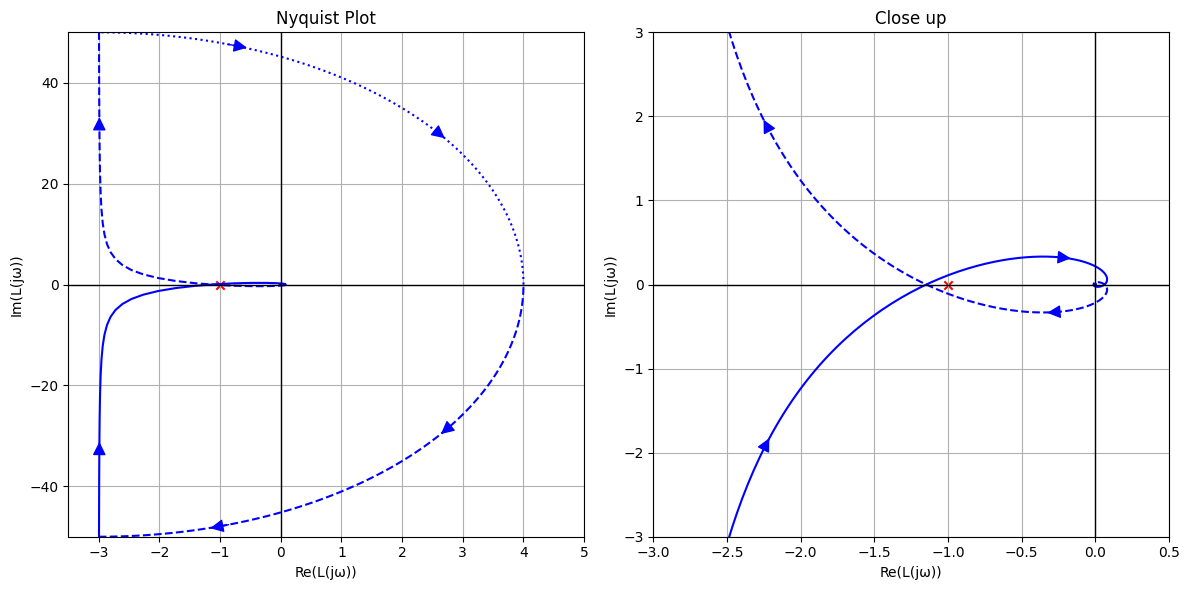

In [67]:
s = ct.TransferFunction.s
L = ct.tf(2 / (s * (s**2 + 4*s + 2)))
omega = np.logspace(-2,2)

mag, phase, omega = ct.bode_plot(L, omega, dB=True, deg=True, plot=False)
phase = phase-omega
G = mag * np.exp(1j * (phase))


plt.figure(figsize=(12,6))

# First subplot (left side)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot

plt.plot(G.real, G.imag, color='blue')


dx = np.gradient(G.real)
dy = np.gradient(G.imag)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude
dy /= magnitude


plt.annotate('', 
             xy=(G.real[6] + dx[6], G.imag[6] + dy[6]),  # End point of the arrow
             xytext=(G.real[6], G.imag[6]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.plot(G.real, -G.imag, color='blue', linestyle='dashed')

dx = np.gradient(G.real)
dy = np.gradient(-G.imag)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude
dy /= magnitude


plt.annotate('', 
             xy=(G.real[6] + dx[6], -G.imag[6] - dy[6]),  # End point of the arrow
             xytext=(G.real[6], -G.imag[6]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

ylim = 50
xlim1 = -3.5
xlim2 = 5
# Mark critical point (-1,0) for stability analysis
plt.scatter([-1], [0], color='red', marker='x')
theta = np.linspace(-np.pi/2, 0, 100)  # Angle from 0 to pi (half circle)
half_circle_real1 = (xlim2+2)*np.cos(theta)-3  # Real part of the half circle
half_circle_imag1 = ylim*np.sin(theta)

dx = np.gradient(half_circle_real1)
dy = np.gradient(half_circle_imag1)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude
dy /= magnitude


plt.annotate('', 
             xy=(half_circle_real1[20] - dx[20], half_circle_imag1[20] - dy[20]),  # End point of the arrow
             xytext=(half_circle_real1[20], half_circle_imag1[20]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))
plt.annotate('', 
             xy=(half_circle_real1[60] - dx[60], half_circle_imag1[60] - dy[60]),  # End point of the arrow
             xytext=(half_circle_real1[60], half_circle_imag1[60]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.plot(half_circle_real1, half_circle_imag1, color='blue',linestyle='dashed')

theta2 = np.linspace(0, np.pi/2, 100)  # Angle from 0 to pi (half circle)
half_circle_real2 = (xlim2+2)*np.cos(theta2)-3  # Real part of the half circle
half_circle_imag2 = ylim*np.sin(theta2)

dx = np.gradient(half_circle_real2)
dy = np.gradient(half_circle_imag2)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude
dy /= magnitude


plt.annotate('', 
             xy=(half_circle_real2[80] - dx[80], half_circle_imag2[80] - dy[80]),  # End point of the arrow
             xytext=(half_circle_real2[80], half_circle_imag2[80]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))
plt.annotate('', 
             xy=(half_circle_real2[40] - dx[40], half_circle_imag2[40] - dy[40]),  # End point of the arrow
             xytext=(half_circle_real2[40], half_circle_imag2[40]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.plot(half_circle_real2, half_circle_imag2, color='blue',linestyle='dotted')

# Plot settings for first plot
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Nyquist Plot')
plt.xlabel('Re(L(jω))')
plt.ylabel('Im(L(jω))')
plt.ylim([-ylim,ylim])
plt.xlim([xlim1, xlim2])
plt.grid(True)


# Second subplot (right side)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
omega = np.logspace(-1, 7, 1000)
mag, phase, omega = ct.bode_plot(L, omega, dB=True, deg=True, plot=False)
phase = phase-omega
G = mag * np.exp(1j * (phase))

dx = np.gradient(G.real)
dy = np.gradient(G.imag)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude*10
dy /= magnitude*10


plt.annotate('', 
             xy=(G.real[60] + dx[60], G.imag[60] + dy[60]),  # End point of the arrow
             xytext=(G.real[60], G.imag[60]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.annotate('', 
             xy=(G.real[130] + dx[130], G.imag[130] + dy[130]),  # End point of the arrow
             xytext=(G.real[130], G.imag[130]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.plot(G.real, G.imag, color='blue')

dx = np.gradient(G.real)
dy = np.gradient(G.imag)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude*10
dy /= magnitude*10


plt.annotate('', 
             xy=(G.real[60] - dx[60], -G.imag[60] + dy[60]),  # End point of the arrow
             xytext=(G.real[60], -G.imag[60]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.annotate('', 
             xy=(G.real[130] - dx[130], -G.imag[130] + dy[130]),  # End point of the arrow
             xytext=(G.real[130], -G.imag[130]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.plot(G.real, -G.imag, color='blue', linestyle='dashed')

# Mark critical point (-1,0) for stability analysis
plt.scatter([-1], [0], color='red', marker='x')

# Plot settings for second plot
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Close up')
plt.xlabel('Re(L(jω))')
plt.ylabel('Im(L(jω))')
plt.ylim([-3,3])
plt.xlim([-3, 0.5])
plt.grid(True)


# Display the plots
plt.tight_layout()  # Adjusts spacing between the plots
plt.savefig('nyqist_plot_sol.jpg', format='jpg', dpi=300)
plt.show()





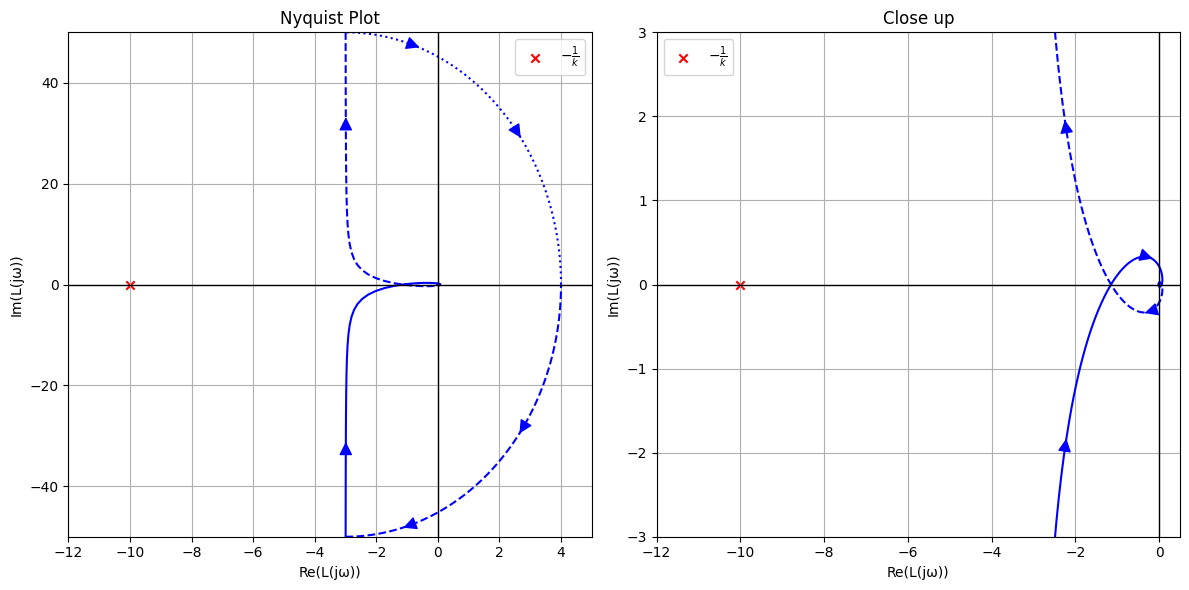

In [90]:
s = ct.TransferFunction.s
L = ct.tf(2 / (s * (s**2 + 4*s + 2)))
omega = np.logspace(-2,2)

mag, phase, omega = ct.bode_plot(L, omega, dB=True, deg=True, plot=False)
phase = phase-omega
G = mag * np.exp(1j * (phase))


plt.figure(figsize=(12,6))

# First subplot (left side)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot

plt.plot(G.real, G.imag, color='blue')


dx = np.gradient(G.real)
dy = np.gradient(G.imag)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude
dy /= magnitude


plt.annotate('', 
             xy=(G.real[6] + dx[6], G.imag[6] + dy[6]),  # End point of the arrow
             xytext=(G.real[6], G.imag[6]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.plot(G.real, -G.imag, color='blue', linestyle='dashed')

dx = np.gradient(G.real)
dy = np.gradient(-G.imag)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude
dy /= magnitude


plt.annotate('', 
             xy=(G.real[6] + dx[6], -G.imag[6] - dy[6]),  # End point of the arrow
             xytext=(G.real[6], -G.imag[6]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

ylim = 50
xlim1 = -12
xlim2 = 5
# Mark critical point (-1,0) for stability analysis
plt.scatter([-10], [0], color='red', marker='x',label = '$-\\frac{1}{k}$')
theta = np.linspace(-np.pi/2, 0, 100)  # Angle from 0 to pi (half circle)
half_circle_real1 = (xlim2+2)*np.cos(theta)-3  # Real part of the half circle
half_circle_imag1 = ylim*np.sin(theta)

dx = np.gradient(half_circle_real1)
dy = np.gradient(half_circle_imag1)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude
dy /= magnitude


plt.annotate('', 
             xy=(half_circle_real1[20] - dx[20], half_circle_imag1[20] - dy[20]),  # End point of the arrow
             xytext=(half_circle_real1[20], half_circle_imag1[20]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))
plt.annotate('', 
             xy=(half_circle_real1[60] - dx[60], half_circle_imag1[60] - dy[60]),  # End point of the arrow
             xytext=(half_circle_real1[60], half_circle_imag1[60]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.plot(half_circle_real1, half_circle_imag1, color='blue',linestyle='dashed')

theta2 = np.linspace(0, np.pi/2, 100)  # Angle from 0 to pi (half circle)
half_circle_real2 = (xlim2+2)*np.cos(theta2)-3  # Real part of the half circle
half_circle_imag2 = ylim*np.sin(theta2)

dx = np.gradient(half_circle_real2)
dy = np.gradient(half_circle_imag2)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude
dy /= magnitude


plt.annotate('', 
             xy=(half_circle_real2[80] - dx[80], half_circle_imag2[80] - dy[80]),  # End point of the arrow
             xytext=(half_circle_real2[80], half_circle_imag2[80]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))
plt.annotate('', 
             xy=(half_circle_real2[40] - dx[40], half_circle_imag2[40] - dy[40]),  # End point of the arrow
             xytext=(half_circle_real2[40], half_circle_imag2[40]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.plot(half_circle_real2, half_circle_imag2, color='blue',linestyle='dotted')

# Plot settings for first plot
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Nyquist Plot')
plt.xlabel('Re(L(jω))')
plt.ylabel('Im(L(jω))')
plt.ylim([-ylim,ylim])
plt.xlim([xlim1, xlim2])
plt.grid(True)
plt.legend()


# Second subplot (right side)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
omega = np.logspace(-1, 7, 1000)
mag, phase, omega = ct.bode_plot(L, omega, dB=True, deg=True, plot=False)
phase = phase-omega
G = mag * np.exp(1j * (phase))

dx = np.gradient(G.real)
dy = np.gradient(G.imag)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude*10
dy /= magnitude*10


plt.annotate('', 
             xy=(G.real[60] + dx[60], G.imag[60] + dy[60]),  # End point of the arrow
             xytext=(G.real[60], G.imag[60]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.annotate('', 
             xy=(G.real[130] + dx[130], G.imag[130] + dy[130]),  # End point of the arrow
             xytext=(G.real[130], G.imag[130]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.plot(G.real, G.imag, color='blue')

dx = np.gradient(G.real)
dy = np.gradient(G.imag)

magnitude = np.sqrt(dx**2 + dy**2)
dx /= magnitude*10
dy /= magnitude*10


plt.annotate('', 
             xy=(G.real[60] - dx[60], -G.imag[60] + dy[60]),  # End point of the arrow
             xytext=(G.real[60], -G.imag[60]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.annotate('', 
             xy=(G.real[130] - dx[130], -G.imag[130] + dy[130]),  # End point of the arrow
             xytext=(G.real[130], -G.imag[130]),  # Start point of the arrow
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='-|>',mutation_scale=20))

plt.plot(G.real, -G.imag, color='blue', linestyle='dashed')

# Mark critical point (-1,0) for stability analysis
plt.scatter([-10], [0], color='red', marker='x',label = '$-\\frac{1}{k}$')

# Plot settings for second plot
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Close up')
plt.xlabel('Re(L(jω))')
plt.ylabel('Im(L(jω))')
plt.ylim([-3,3])
plt.xlim([-12, 0.5])
plt.grid(True)
plt.legend()


# Display the plots
plt.tight_layout()  # Adjusts spacing between the plots
plt.savefig('nyqist_plot_sol_2.jpg', format='jpg', dpi=300)
plt.show()



